# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [3]:
output_name = '100_example_1000_protected.csv'

In [4]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

Import project files

In [6]:
#import sys
#sys.path.append("utils")
# from utils import models

In [7]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [8]:
train_file = 'data/df_filtered_100.csv'

Getting dataframe

In [9]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 0 ns
Wall time: 7 ms


## 1+2) Lemmatizing and protecting stopwords

Defininig the protected word list

In [10]:
nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
print('Number of protected words:', len(nlp_utils.stopword_list))
print(nlp_utils.stopword_list[:10])

Number of protected words: 1075
['play', 'dear', 'major', 'brother', 'lake', 'took', 'care', 'farm', 'straight', 'total']


Defining the word dictionary

In [11]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 4.22 s
Wall time: 6.62 s


In [12]:
print('Number of different words:', len(word_dict))

Number of different words: 792


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [13]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 2.2074031550245317
CPU times: total: 766 ms
Wall time: 925 ms


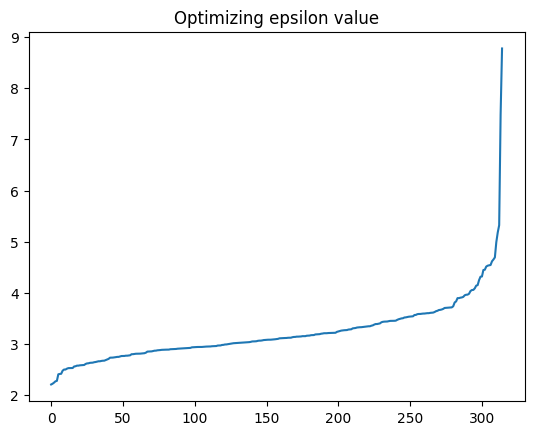

In [14]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [15]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

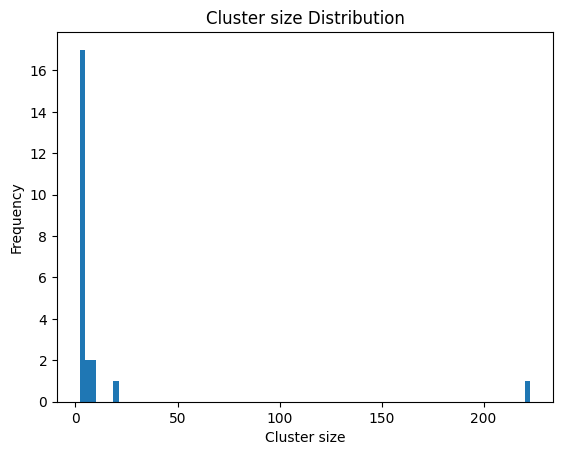

In [16]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

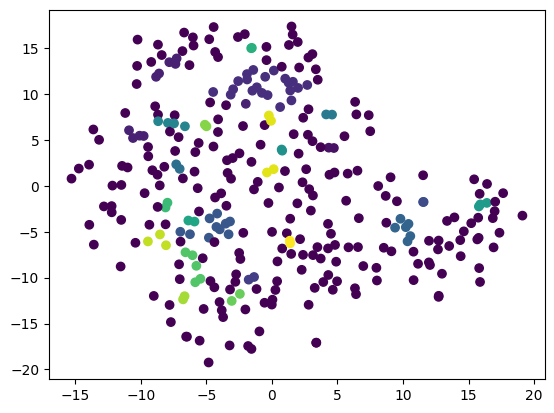

CPU times: total: 7.12 s
Wall time: 12.6 s


In [17]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.07616335


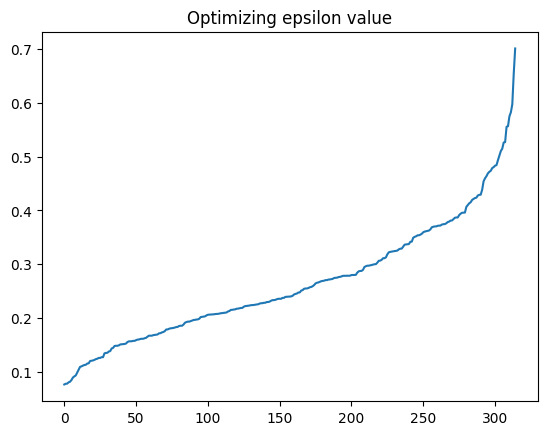

In [18]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

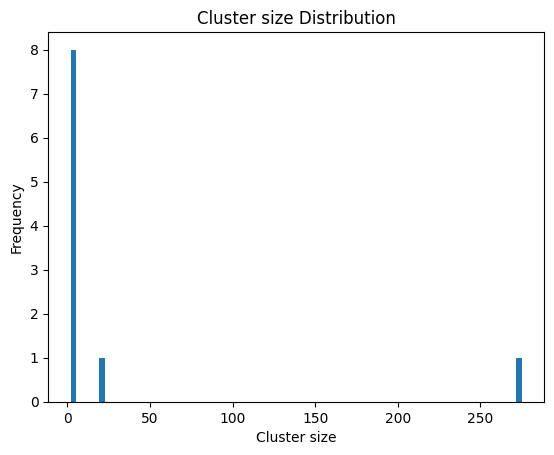

In [19]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

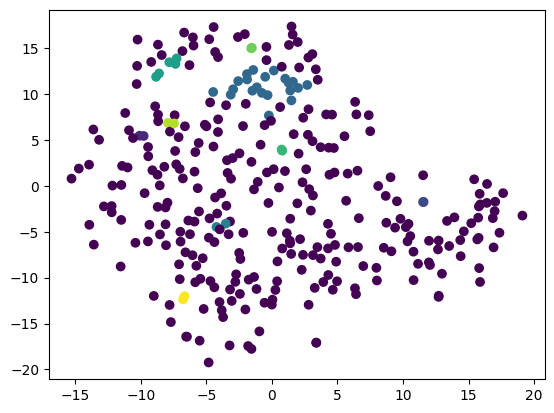

CPU times: total: 7.22 s
Wall time: 8.33 s


In [20]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [21]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

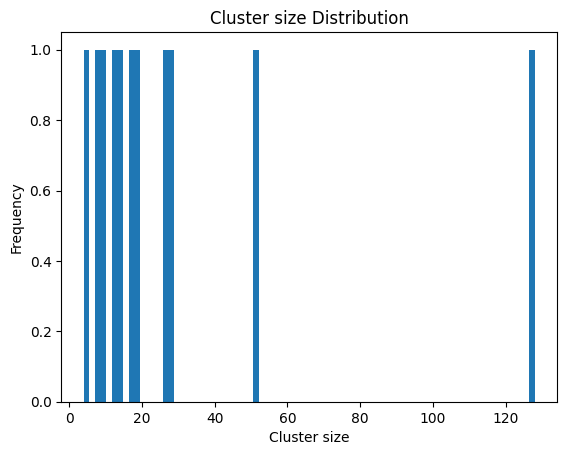

In [22]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

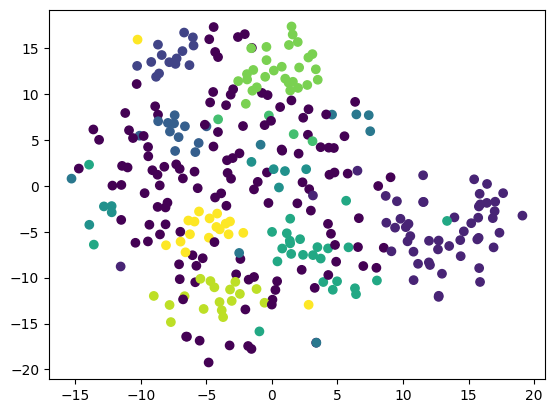

In [23]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [24]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 23 clusters
Cosine distance:	 10 clusters
HDBSCAN clustering:	 11 clusters


Plotting Jaccard index histogram

In [25]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['banana', 'love', 'hi', 'chocolate', 'cola']

Getting distance threshold

In [26]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [27]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.1096684460320824
Distance threshold: 0.3036462366580963
distance: 0.17109755 	replacing ['punch', 'loose'] in throw
distance: 0.33426496 the next cluster is too wide and wont be replaced: ['disappointing', 'awesome', 'awful', 'unbelievable', 'perfect', 'amazing', 'fantastic', 'worse', 'incredible', 'frustrating']
distance: 0.29132065 	replacing ['worth', 'really', 'something', 'almost', 'everything', 'absolutely', 'someone', 'yesterday', 'surprised', 'anyone', 'maybe', 'anything', 'probably', 'definitely', 'already', 'today', 'forget', 'actually', 'without', 'possibly', 'exactly'] in there
distance: 0.18335372 	replacing ['scene', 'movie'] in episode
distance: 0.12681131 	replacing ['granddaughter', 'grandson'] in grandfather
distance: 0.2993957 	replacing ['selection', 'shipping', 'package', 'exchange', 'purchase', 'installation', 'delivery', 'production', 'available', 'price'] in includes
distance: 0.25207773 	replacing ['elizabeth', 'scarlett', 'mrs

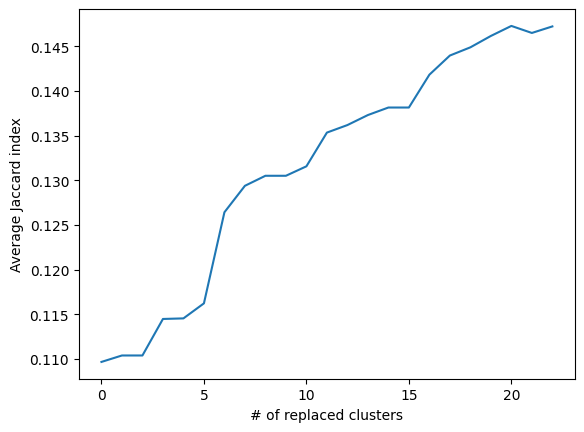

In [28]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [29]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was there the bad book i hav...,(just) awful: (this) (was) [there] (the) {bad}...,1,3,18,3
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) (one) (of) (...,1,3,14,5
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) (size)...,0,4,13,4
3,732,the scarlett letter: written in old english. i...,0,28,the rebecca letter : written in old english . ...,(the) [rebecca] (letter:) (written) (in) (old)...,1,1,23,3
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) (read) (this) (book!!:) (this) (book) ...,1,1,14,7
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great find : after long search for handbook of...,(great) (find:) (after) (long) (search) (for) ...,3,4,15,5
96,1982,awesome costume: this is a great costume. all ...,1,22,awesome costume : this is a great costume . al...,awesome costume: (this) (is) (a) (great) costu...,1,2,13,6
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i got this for 40 there dollar a...,(great) (value:) (i) (got) (this) (for) 40 [th...,1,1,14,7
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture hd triology ...,spider-man - (the) (motion) (picture) [hd] tri...,2,3,16,5


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.1096684460320824
Distance threshold: 0.3036462366580963
distance: 0.13271642 	replacing ['disappointing', 'frustrating'] in predictable
distance: 0.12681131 	replacing ['granddaughter', 'grandson'] in grandfather
distance: 0.29131547 	replacing ['really', 'something', 'almost', 'everything', 'absolutely', 'someone', 'yesterday', 'surprised', 'anyone', 'maybe', 'anything', 'probably', 'definitely', 'easy', 'already', 'today', 'forget', 'actually', 'without', 'possibly', 'exactly'] in there
distance: 0.15502782 	replacing ['package', 'purchase'] in includes
distance: 0.20829383 	replacing ['awesome', 'perfect', 'amazing', 'fantastic', 'incredible'] in great
distance: 0.15079136 	replacing ['upon', 'within'] in through
distance: 0.10555353 	replacing ['kid', 'guy'] in called
distance: 0.12038027 	replacing ['somewhat', 'fairly'] in particularly
distance: 0.11645546 	replacing ['dvd', 'cd'] in hd
Final average Jaccard index: 0.11417297629418842
CPU times: 

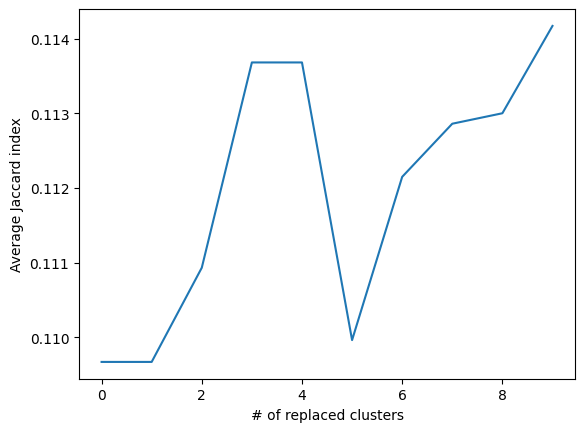

In [30]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [31]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was there the bad book i hav...,(just) awful: (this) (was) [there] (the) {bad}...,1,3,18,3
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most pred...,(no) {lesson} {learn} (this) (is) (one) (of) (...,2,3,14,4
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) (size)...,0,4,13,4
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : written in old english ....,(the) [rebecca] (letter:) (written) (in) (old)...,1,1,23,3
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) (read) (this) (book!!:) (this) (book) ...,1,1,14,7
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great find : after long search for translation...,(great) (find:) (after) (long) (search) (for) ...,5,4,15,3
96,1982,awesome costume: this is a great costume. all ...,1,22,great costume : this is a great costume . all ...,[great] costume: (this) (is) (a) (great) costu...,2,2,13,5
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i got this for 40 there dollar a...,(great) (value:) (i) (got) (this) (for) 40 [th...,1,1,14,7
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture hd triology ...,spider-man - (the) (motion) (picture) [hd] tri...,2,3,16,5


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.1096684460320824
Distance threshold: 0.3036462366580963
distance: 0.33795553 the next cluster is too wide and wont be replaced: ['disappointing', 'entirely', 'amaze', 'socially', 'somewhat', 'aware', 'acceptable', 'ridiculously', 'pleasing', 'highly', 'poorly', 'fairly']
distance: 0.33150777 the next cluster is too wide and wont be replaced: ['nice', 'birthday', 'awesome', 'perfect', 'romantic', 'amazing', 'enjoy', 'fantastic', 'christmas', 'welcome', 'favorite', 'beautiful', 'incredible', 'wonderful']
distance: 0.5348966 the next cluster is too wide and wont be replaced: ['mesmerize', 'granddaughter', 'softcover', 'elizabeth', 'invasion', 'scarlett', 'adam', 'dolly', 'electrodance', 'mrs', 'actionmovie', 'shia', 'docker', 'bratz', 'remastere', 'tmnt', 'stray', 'recommendable', 'triology', 'parton', 'winthrop', 'painstakingly', 'waster', 'trite', 'grandson', 'laughoutloud', 'sandler', 'iraqi', 'storie', 'mule', 'myopic', 'goer', 'libertarian', 'tuscan'

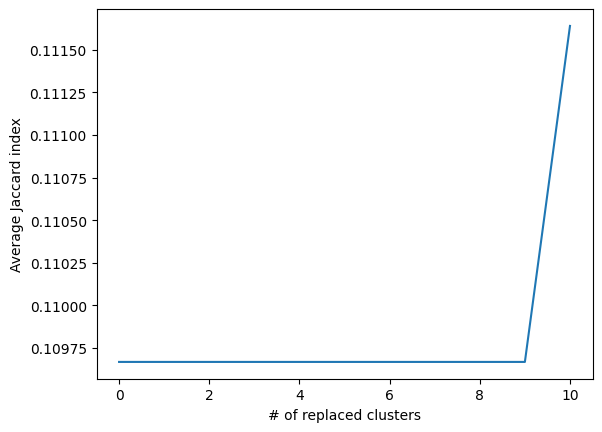

In [32]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [33]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) awful: (this) (was) [there] (the) {bad}...,1,3,18,3
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) (one) (of) (...,2,3,14,4
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) (size)...,0,4,13,4
3,732,the scarlett letter: written in old english. i...,0,28,the scarlett letter : written in old english ....,(the) [rebecca] (letter:) (written) (in) (old)...,1,1,23,3
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) (read) (this) (book!!:) (this) (book) ...,1,1,14,7
...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great find : after long search for translation...,(great) (find:) (after) (long) (search) (for) ...,5,4,15,3
96,1982,awesome costume: this is a great costume. all ...,1,22,awesome costume : this is a great costume . al...,[great] costume: (this) (is) (a) (great) costu...,2,2,13,5
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i got this for 40 something doll...,(great) (value:) (i) (got) (this) (for) 40 [th...,1,1,14,7
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture dvd triology...,spider-man - (the) (motion) (picture) [hd] tri...,2,3,16,5


Looking at the histogram again

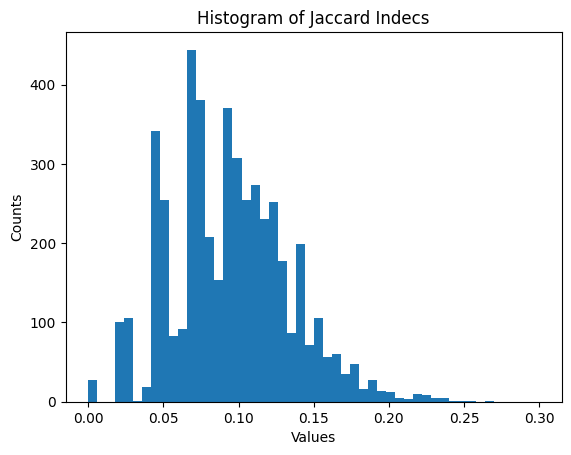

CPU times: total: 922 ms
Wall time: 1.9 s


In [34]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

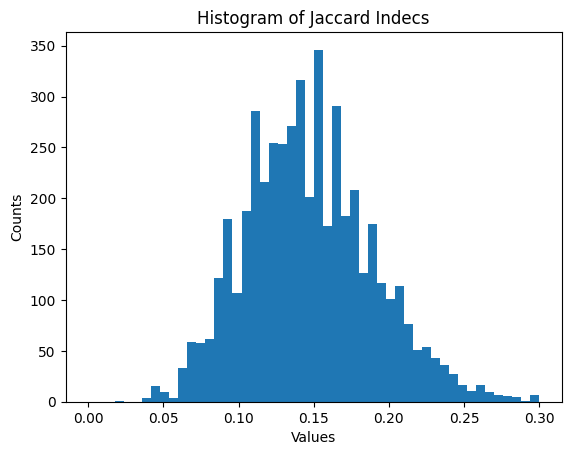

CPU times: total: 906 ms
Wall time: 2.8 s


In [35]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

For eucledian distance

In [36]:
protected, lemma, replaced, all_words = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all_words}')

Protected: 326	Lemmatized: 188	 Replaced: 84	 All: 800


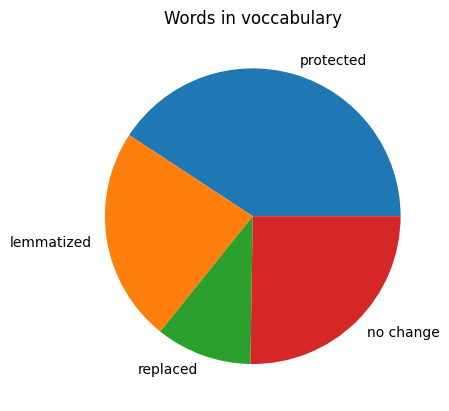

In [37]:
y = np.array([protected, lemma, replaced, (all_words - protected - lemma - replaced)])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in voccabulary')
plt.show()

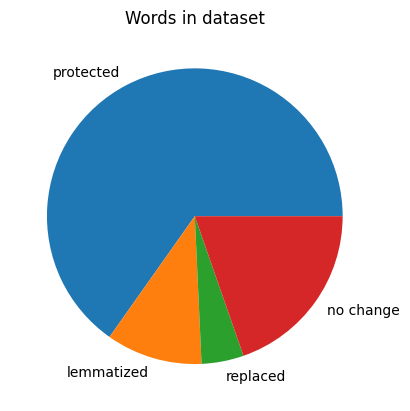

In [38]:
y = np.array([df_2['num_protected'].sum(), df_2['num_lemmatized'].sum(), df_2['num_replaced'].sum(), df_2['num_no_change'].sum()])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [39]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 100 	number of all documents: 100


After replacement

In [40]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 100 	number of all documents: 100


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [41]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [42]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking after moving over 2 of all 3 indexes.
unused_indexes: [2]
Could not create a bow: empty vocabulary; perhaps the documents only contain stop words
End: get_anonym_degree: None


['I love *', 'I love *', '*']

In [43]:
force_anon_txt_annoy = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 32]
similar_doc_ind [1, 28]
similar_doc_ind [2, 66]
similar_doc_ind [3, 80]
similar_doc_ind [4, 5]
similar_doc_ind [6, 7]
similar_doc_ind [8, 38]
similar_doc_ind [9, 33]
similar_doc_ind [10, 11]
similar_doc_ind [12, 70]
similar_doc_ind [13, 17]
similar_doc_ind [14, 25]
similar_doc_ind [15, 16]
similar_doc_ind [18, 19]
similar_doc_ind [20, 31]
similar_doc_ind [21, 43]
similar_doc_ind [22, 8]
Error!: 8 was already used.
similar_doc_ind [23, 48]
similar_doc_ind [24, 30]
similar_doc_ind [26, 74]
similar_doc_ind [27, 56]
similar_doc_ind [29, 72]
similar_doc_ind [34, 35]
similar_doc_ind [36, 60]
similar_doc_ind [37, 49]
similar_doc_ind [39, 44]
similar_doc_ind [40, 3]
Error!: 3 was already used.
similar_doc_ind [41, 57]
similar_doc_ind [42, 45]
similar_doc_ind [46, 47]
similar_doc_ind [50, 91]
similar_doc_ind [51, 9]
Error!: 9 was already used.
similar_doc_ind [52, 81]
similar_doc_ind [53, 58]
similar_doc_ind [54, 55]
similar_doc_ind [59, 61]
s

(1, [[66], [80], [28], [33], [32]])

In [44]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(force_anon_txt_annoy)
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 5 	number of all documents: 100


In [45]:
df_2['force_anon_txt'] = force_anon_txt_annoy
# Counting the number of words and *
df_2['num_of_words_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\w+', x)))
df_2['num_of_deleting_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\*', x)))

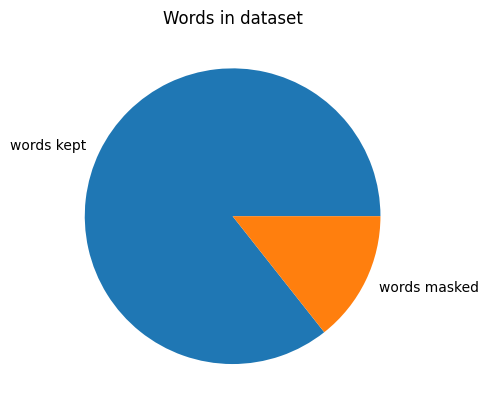

In [46]:
y = np.array([df_2['num_of_words_after_forcing'].sum(), df_2['num_of_deleting_after_forcing'].sum()])
mylabels = ['words kept', 'words masked']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

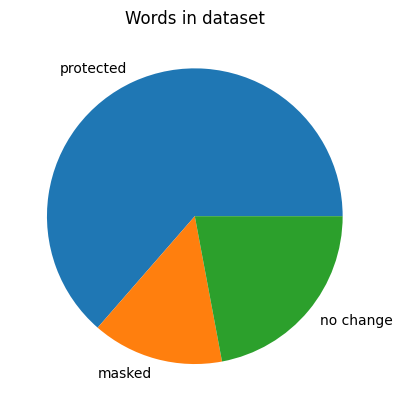

In [47]:
y = np.array([df_2['num_protected'].sum(), df_2['num_of_deleting_after_forcing'].sum(), (df_2['num_of_words_after_forcing'] - df_2['num_protected']).sum()])
mylabels = ['protected', 'masked', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [48]:
i = 1
print(df_2['txt'][i])
print(df_2['anon_txt_history'][i])
print(df_2['force_anon_txt'][i])

no lessons learned: this is one of the most disappointing purchases i have made on amazon.the book is one long, myopic, libertarian apology.
(no) {lesson} {learn} (this) (is) (one) (of) (the) (most) disappointing {purchase} (i) (have) (made) (on) amazon.the (book) (is) (one) (long,) [misanthropic] libertarian apology. 
no * learn : this is one of * most * include i have made on *.* book is one long , * , * * .


## 5) Utilization tests

In [49]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change,force_anon_txt,num_of_words_after_forcing,num_of_deleting_after_forcing,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,461,just awful: this was possibly the worst book i...,0,25,just awful : this was there the bad book i hav...,(just) awful: (this) (was) [there] (the) {bad}...,1,3,18,3,just * : this was there * bad book i have ever...,19,6,-0.5574,-0.1779,-0.4939
1,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) (one) (of) (...,1,3,14,5,no * learn : this is one of * most * include i...,16,8,-0.5563,-0.5563,-0.2960
2,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) (size)...,0,4,13,4,* : i order * to the size chart for my * and i...,17,5,0.0000,0.0000,0.0000
3,732,the scarlett letter: written in old english. i...,0,28,the rebecca letter : written in old english . ...,(the) [rebecca] (letter:) (written) (in) (old)...,1,1,23,3,the * letter : written in old * . it was very ...,26,2,-0.0516,-0.0258,-0.0258
4,852,don't read this book!!: this book sux! who car...,0,23,do not read this book ! ! : this book sux ! wh...,(don't) (read) (this) (book!!:) (this) (book) ...,1,1,14,7,do not read this book ! ! : this book * ! who ...,19,5,-0.8507,-0.8429,-0.4344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1951,great find: after long search for translation ...,1,27,great find : after long search for handbook of...,(great) (find:) (after) (long) (search) (for) ...,3,4,15,5,great find : after long search for * of * 's p...,20,8,0.9100,0.9100,0.6249
96,1982,awesome costume: this is a great costume. all ...,1,22,awesome costume : this is a great costume . al...,awesome costume: (this) (is) (a) (great) costu...,1,2,13,6,* * : this is a great * . all the * piece make...,16,6,0.9460,0.9460,0.8481
97,2107,great value: i got this for 40 something dolla...,1,23,great value : i got this for 40 there dollar a...,(great) (value:) (i) (got) (this) (for) 40 [th...,1,1,14,7,great value : i got this for * there dollar an...,17,6,0.9403,0.9403,0.9403
98,2116,spider-man - the motion picture dvd triology: ...,1,26,spider - man - the motion picture hd triology ...,spider-man - (the) (motion) (picture) [hd] tri...,2,3,16,5,* - man - the motion picture * * : this * was ...,21,5,0.4404,0.4404,0.4404


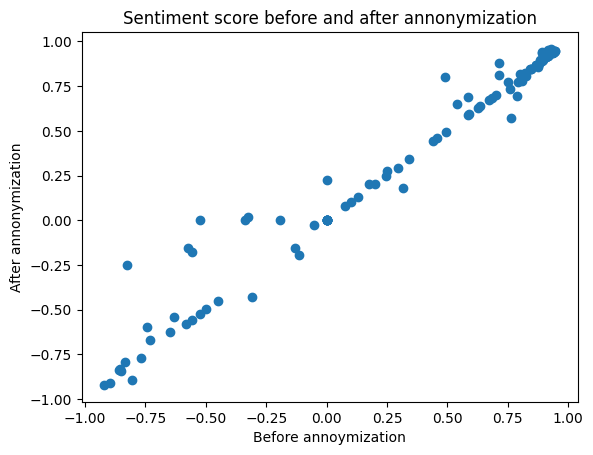

In [50]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


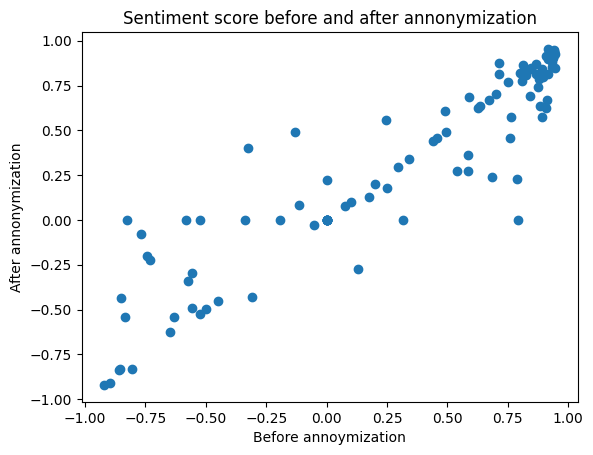

In [51]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [52]:
utilization_utils.sentiment_test(df_2, 'txt')

63    good value: i love curve and this is a large b...
3     the scarlett letter: written in old english. i...
79    great christmas classic: i loved this movie as...
25    :0( booo!: first the acting was so so so bad t...
7     it stopped working after a few weeks: it worke...
                            ...                        
75    classic tale: loved this book as well. the mov...
24    a time waster: this is one of the worst movies...
14    not very good: i don't remember this movie, so...
6     don't buy it!: ever since i bought this and ch...
55    nifty: it is very convenient to have the charg...
Name: txt, Length: 80, dtype: object


0.6458333333333333

In [53]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

20    do not buy : this is the bad recording of nirv...
17    zzzzzzzzzz ..... snooze - f : great , another ...
0     just awful : this was there the bad book i hav...
52    textbook : book ship quickly and was in excell...
45    summer - estate : there who hear this song and...
                            ...                        
79    great christmas classic : i love this episode ...
33    have not receive my item in a month . : my ord...
6     do not buy it ! : ever since i bought this and...
88    fast and in good shape : it came to me pretty ...
42    do not buy this scanner : there the bad softwa...
Name: anon_txt, Length: 80, dtype: object


0.5416666666666666

The fully anonymized text gets he highest accuracy score!

In [54]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

83    plain and simple : a women 's * to the * : thi...
40    color include . : i find it very * not to be a...
0     just * : this was there * bad book i have ever...
90    * * : this book is laugh - out - loud * , a gr...
93    * : this cell is great . the service i got whe...
                            ...                        
24    a time * : this is one of the bad episode i ' ...
55    * : it is very * to have the charge * include ...
52    * : book ship * and was in excellent condition...
12    sad : what happen to the amazing * * from like...
45    summer - * : there who hear this song and is n...
Name: force_anon_txt, Length: 80, dtype: object


0.625

In [55]:
filename = 'outputs/' + output_name
df_2.to_csv(filename, index=False)

In [56]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
len(nlp_utils.stopwords.words('english'))

179

In [58]:
len(nlp_utils.stopword_list)

1075

In [59]:
nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
len(nlp_utils.stopword_list)

1075